# Таликов А.Ю. 18-ИВТ-3
## Лабораторная работа № 2. Методы классификации данных
### Вариант 38
#### Набор данных: 9
#### Классификаторы:
- 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
- 3 – линейный классификатор (персептрон);


#### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

  t-time
  
- tBodyAcc-XYZ - ускорение тела по осям XYZ
- tGravityAcc-XYZ -ускорение гравитации по осям XYZ
- tBodyAccJerk-XYZ - мгновенное ускорение тела по осям XYZ
- tBodyGyro-XYZ - Положение тела в пространстве XYZ
- tBodyGyroJerk-XYZ - гироскоп ускорения тела по осям XYZ
- tBodyAccMag
- tGravityAccMag
- tBodyAccJerkMag
- tBodyGyroMag
- tBodyGyroJerkMag

 f-обозначения сигналов частотной области
 
- fBodyAcc-XYZ - ускорение тела по осям XYZ
- fBodyAccJerk-XYZ - мгновенное ускорение тела по осям XYZ
- fBodyGyro-XYZ - Положение тела в пространстве XYZ
- fBodyAccMag
- fBodyAccJerkMag
- fBodyGyroMag
- fBodyGyroJerkMag


- mean (): среднее значение
- std (): стандартное отклонение
- mad (): медианное абсолютное отклонение
- max(): наибольшее значение в массиве
- min(): наименьшее значение в массиве
- sma (): область величины сигнала
- energy (): мера энергии. Сумма квадратов делится на количество значений.
- iqr(): межквартильный размах
- entropy (): энтропия сигнала
- arCoeff (): коэффициенты авторегрессии с порядком Бурга равным 4
- correlation (): коэффициент корреляции между двумя сигналами
- maxInds (): индекс частотной составляющей с наибольшей величиной
- meanFreq (): средневзвешенное значение частотных составляющих для получения средней частоты
- skewness(): асимметрия сигнала в частотной области
- kurtosis (): эксцесс сигнала в частотной области
- bandsEnergy (): энергия частотного интервала в пределах 64 ячеек БПФ каждого окна.
- angle (): угол между векторами to.

In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
Data = pd.read_csv('X_test.txt', header=None, delimiter=r"\s+")
X_test = pd.DataFrame(Data)
df = pd.read_csv('y_test.txt')
y_test = pd.DataFrame(df)
df = pd.read_csv('y_train.txt')
y_train = pd.DataFrame(df)
Data = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+")
X_train = pd.DataFrame(Data)

#### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [96]:
X_test

0         1         2         3         4         5         6    \
0     0.257178 -0.023285 -0.014654 -0.938404 -0.920091 -0.667683 -0.952501   
1     0.286027 -0.013163 -0.119083 -0.975415 -0.967458 -0.944958 -0.986799   
2     0.275485 -0.026050 -0.118152 -0.993819 -0.969926 -0.962748 -0.994403   
3     0.270298 -0.032614 -0.117520 -0.994743 -0.973268 -0.967091 -0.995274   
4     0.274833 -0.027848 -0.129527 -0.993852 -0.967445 -0.978295 -0.994111   
...        ...       ...       ...       ...       ...       ...       ...   
2942  0.310155 -0.053391 -0.099109 -0.287866 -0.140589 -0.215088 -0.356083   
2943  0.363385 -0.039214 -0.105915 -0.305388  0.028148 -0.196373 -0.373540   
2944  0.349966  0.030077 -0.115788 -0.329638 -0.042143 -0.250181 -0.388017   
2945  0.237594  0.018467 -0.096499 -0.323114 -0.229775 -0.207574 -0.392380   
2946  0.153627 -0.018437 -0.137018 -0.330046 -0.195253 -0.164339 -0.430974   

           7         8         9    ...       551       552       553  \
0    -0.925249 -0.674302 -0.894088  ...  0.071645 -0.330370 -0.705974   
1    -0.968401 -0.945823 -0.894088  ... -0.401189 -0.121845 -0.594944   
2    -0.970735 -0.963483 -0.939260  ...  0.062891 -0.190422 -0.640736   
3    -0.974471 -0.968897 -0.938610  ...  0.116695 -0.344418 -0.736124   
4    -0.965953 -0.977346 -0.938610  ... -0.121711 -0.534685 -0.846595   
...        ...       ...       ...  ...       ...       ...       ...   
2942 -0.148775 -0.232057  0.185361  ...  0.074472 -0.376278 -0.750809   
2943 -0.030036 -0.270237  0.185361  ...  0.101859 -0.320418 -0.700274   
2944 -0.133257 -0.347029  0.007471  ... -0.066249 -0.118854 -0.467179   
2945 -0.279610 -0.289477  0.007471  ... -0.046467 -0.205445 -0.617737   
2946 -0.218295 -0.229933 -0.111527  ... -0.010386 -0.072237 -0.436940   

           554       555       556       557       558       559       560  
0     0.006462  0.162920 -0.825886  0.271151 -0.720009  0.276801 -0.057978  
1    -0.083495  0.017500 -0.434375  0.920593 -0.698091  0.281343 -0.083898  
2    -0.034956  0.202302  0.064103  0.145068 -0.702771  0.280083 -0.079346  
3    -0.017067  0.154438  0.340134  0.296407 -0.698954  0.284114 -0.077108  
4    -0.002223 -0.040046  0.736715 -0.118545 -0.692245  0.290722 -0.073857  
...        ...       ...       ...       ...       ...       ...       ...  
2942 -0.337422  0.346295  0.884904 -0.698885 -0.651732  0.274627  0.184784  
2943 -0.736701 -0.372889 -0.657421  0.322549 -0.655181  0.273578  0.182412  
2944 -0.181560  0.088574  0.696663  0.363139 -0.655357  0.274479  0.181184  
2945  0.444558 -0.819188  0.929294 -0.008398 -0.659719  0.264782  0.187563  
2946  0.598808 -0.287951  0.876030 -0.024965 -0.660080  0.263936  0.188103  

[2947 rows x 561 columns]

In [99]:
len1 = len(X_test)
df.drop_duplicates(keep='first',inplace=True)
len2 = len(X_test)
print("Всего удалено дубликатов:" ,len1 - len2)

Всего удалено дубликатов: 0


In [100]:
X_test

0         1         2         3         4         5         6    \
0     0.257178 -0.023285 -0.014654 -0.938404 -0.920091 -0.667683 -0.952501   
1     0.286027 -0.013163 -0.119083 -0.975415 -0.967458 -0.944958 -0.986799   
2     0.275485 -0.026050 -0.118152 -0.993819 -0.969926 -0.962748 -0.994403   
3     0.270298 -0.032614 -0.117520 -0.994743 -0.973268 -0.967091 -0.995274   
4     0.274833 -0.027848 -0.129527 -0.993852 -0.967445 -0.978295 -0.994111   
...        ...       ...       ...       ...       ...       ...       ...   
2942  0.310155 -0.053391 -0.099109 -0.287866 -0.140589 -0.215088 -0.356083   
2943  0.363385 -0.039214 -0.105915 -0.305388  0.028148 -0.196373 -0.373540   
2944  0.349966  0.030077 -0.115788 -0.329638 -0.042143 -0.250181 -0.388017   
2945  0.237594  0.018467 -0.096499 -0.323114 -0.229775 -0.207574 -0.392380   
2946  0.153627 -0.018437 -0.137018 -0.330046 -0.195253 -0.164339 -0.430974   

           7         8         9    ...       551       552       553  \
0    -0.925249 -0.674302 -0.894088  ...  0.071645 -0.330370 -0.705974   
1    -0.968401 -0.945823 -0.894088  ... -0.401189 -0.121845 -0.594944   
2    -0.970735 -0.963483 -0.939260  ...  0.062891 -0.190422 -0.640736   
3    -0.974471 -0.968897 -0.938610  ...  0.116695 -0.344418 -0.736124   
4    -0.965953 -0.977346 -0.938610  ... -0.121711 -0.534685 -0.846595   
...        ...       ...       ...  ...       ...       ...       ...   
2942 -0.148775 -0.232057  0.185361  ...  0.074472 -0.376278 -0.750809   
2943 -0.030036 -0.270237  0.185361  ...  0.101859 -0.320418 -0.700274   
2944 -0.133257 -0.347029  0.007471  ... -0.066249 -0.118854 -0.467179   
2945 -0.279610 -0.289477  0.007471  ... -0.046467 -0.205445 -0.617737   
2946 -0.218295 -0.229933 -0.111527  ... -0.010386 -0.072237 -0.436940   

           554       555       556       557       558       559       560  
0     0.006462  0.162920 -0.825886  0.271151 -0.720009  0.276801 -0.057978  
1    -0.083495  0.017500 -0.434375  0.920593 -0.698091  0.281343 -0.083898  
2    -0.034956  0.202302  0.064103  0.145068 -0.702771  0.280083 -0.079346  
3    -0.017067  0.154438  0.340134  0.296407 -0.698954  0.284114 -0.077108  
4    -0.002223 -0.040046  0.736715 -0.118545 -0.692245  0.290722 -0.073857  
...        ...       ...       ...       ...       ...       ...       ...  
2942 -0.337422  0.346295  0.884904 -0.698885 -0.651732  0.274627  0.184784  
2943 -0.736701 -0.372889 -0.657421  0.322549 -0.655181  0.273578  0.182412  
2944 -0.181560  0.088574  0.696663  0.363139 -0.655357  0.274479  0.181184  
2945  0.444558 -0.819188  0.929294 -0.008398 -0.659719  0.264782  0.187563  
2946  0.598808 -0.287951  0.876030 -0.024965 -0.660080  0.263936  0.188103  

[2947 rows x 561 columns]

#### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

In [101]:
y_train.nunique()

5    6
dtype: int64

In [102]:
sns.countplot(data=y_train, x='5')
plt.show()

Вывод: У 3 данных есть небольшое отклонение от средней величины данных
    

#### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

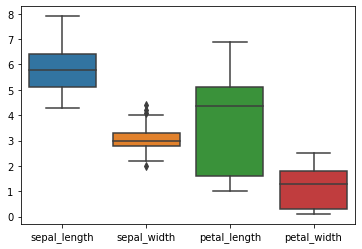

In [104]:
X_train = sns.load_dataset('iris')
sns.boxplot(data = X_train)
plt.show()

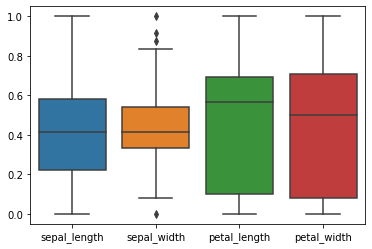

In [105]:
column = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
scaler = preprocessing.MinMaxScaler()
X_train[column] = scaler.fit_transform(X_train[column].values.astype(float))
sns.boxplot(data = X_train[column])
plt.show()

#### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Категориальных признаков нет.

#### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

In [103]:
corr = X_train.corr()
sns.heatmap(corr)

#### 7.	Заполните пропущенные значения в данных

In [106]:
len(X_train)

150

In [107]:
X_train.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

Нет данных которые нужно заполнить

#### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [47]:
iris = datasets.load_iris()
x, y = iris.data, iris.target
X_train, X_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.33, random_state=0)
RNC = RadiusNeighborsClassifier()
RNC_grid = GridSearchCV(RNC, {'radius': [2, 3, 4],'weights': ['uniform', 'distance']})
RNC_grid.fit(X_train, y_train)
y_score = RNC_grid.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Лучший результат : {}'.format(RNC_grid.best_score_))
print('Точность per: %.5f' % accuracy_score(y_score, y_test))

Лучший результат : 0.96
Точность per: 0.96000


3 – линейный классификатор (персептрон);

In [46]:
per = Perceptron()
search = GridSearchCV(estimator=per, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(X_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print(' best:', best,"\n",'alpha:', alpha,"\n", 'max_iter:', max_iter)
per = Perceptron(alpha=alpha, max_iter=max_iter)
per.fit(X_train, y_train)
per_predict = per.predict(X_test)
print(' Accuracy per: %.5f' % accuracy_score(y_test, per_predict))

c:\users\арсений\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\арсений\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\арсений\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 best: 0.9339034485310099 
 alpha: 0.05263157894736842 
 max_iter: 22
 Accuracy per: 0.93790


c:\users\арсений\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


#### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы

PR

In [53]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score

In [57]:
prob_per = CalibratedClassifierCV(per).fit(X_train, y_train).predict_proba(X_test)
prob_RNC = RNC.predict_proba(X_test)

c:\users\арсений\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


NotFittedError: This RadiusNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.